<a href="https://colab.research.google.com/github/tushar-3549/Big-Data-IoT-Lab/blob/main/densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Bigdata/output/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Bigdata/output/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Bigdata/output/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 2153 images belonging to 3 classes.
Found 305 images belonging to 3 classes.
Found 620 images belonging to 3 classes.


In [ ]:
densenet121 = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
)


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet121.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  densenet121,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dropout (Dropout)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 58945091 (224.86 MB)
Trainable params: 519

In [ ]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 15
)

Epoch 1/15
68/68 [==============================] - 708s 10s/step - loss: 4.1554 - accuracy: 0.6270 - val_loss: 0.4469 - val_accuracy: 0.8459
Epoch 2/15
68/68 [==============================] - 577s 8s/step - loss: 0.5604 - accuracy: 0.7845 - val_loss: 0.4394 - val_accuracy: 0.8197
Epoch 3/15
68/68 [==============================] - 606s 9s/step - loss: 0.5293 - accuracy: 0.7956 - val_loss: 0.3542 - val_accuracy: 0.8492
Epoch 4/15
68/68 [==============================] - 609s 9s/step - loss: 0.4974 - accuracy: 0.8059 - val_loss: 0.3368 - val_accuracy: 0.8787
Epoch 5/15
68/68 [==============================] - 579s 9s/step - loss: 0.3778 - accuracy: 0.8356 - val_loss: 0.3371 - val_accuracy: 0.8754
Epoch 6/15
68/68 [==============================] - 597s 9s/step - loss: 0.3631 - accuracy: 0.8416 - val_loss: 0.3432 - val_accuracy: 0.8557
Epoch 7/15
68/68 [==============================] - 595s 9s/step - loss: 0.3938 - accuracy: 0.8388 - val_loss: 0.3143 - val_accuracy: 0.8656
Epoch 8/15
6

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 122s 6s/step - loss: 0.2077 - accuracy: 0.9177
Accuracy: 0.9177419543266296
Loss: 0.20774108171463013


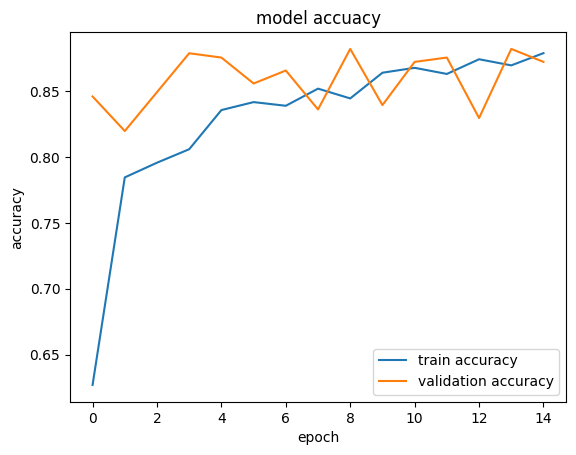

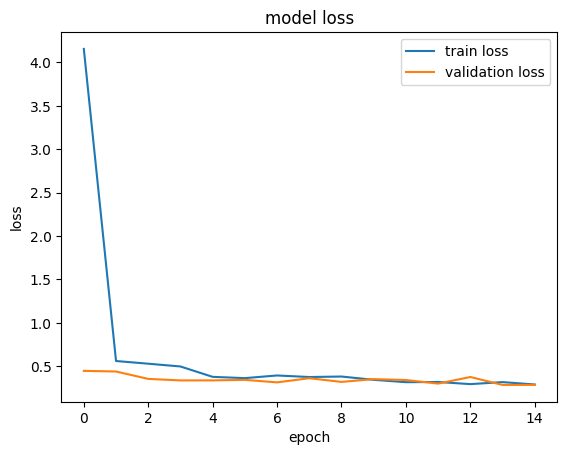

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()